# Train a VAE on Cell Painting LINCS Data

In [2]:
import sys
import pathlib
import numpy as np
import pandas as pd

from tensorflow import keras

sys.path.insert(0, "../../scripts")
from utils import load_data, infer_L1000_features
from vae import VAE
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubun

In [4]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [55]:
# np.random.seed(123)
# python_random.seed(123)
# tf.random.set_random_seed(1234)

<IPython.core.display.Javascript object>

In [3]:
# data_splits = ["train", "valid", "test", "complete"]
data_splits = ["test"]
data_dict = load_data(data_splits, dataset="L1000")

In [4]:
# Prepare data for training

meta_features = infer_L1000_features(data_dict["test"], metadata=True)
profile_features = infer_L1000_features(data_dict["test"])

# train_features_df = data_dict["train"].reindex(profile_features, axis="columns")
# train_meta_df = data_dict["train"].reindex(meta_features, axis="columns")

# valid_features_df = data_dict["valid"].reindex(profile_features, axis="columns")
# valid_meta_df = data_dict["valid"].reindex(meta_features, axis="columns")

test_features_df = data_dict["test"].reindex(profile_features, axis="columns")
test_meta_df = data_dict["test"].reindex(meta_features, axis="columns")

# complete_features_df = data_dict["complete"].reindex(profile_features, axis="columns")
# complete_meta_df = data_dict["complete"].reindex(meta_features, axis="columns")

In [5]:
components = np.arange(1, 51)
reconstructions = []
for component in components:
    pca = PCA(n_components=component)
    principalComponents = pca.fit_transform(test_features_df)
    reconstruction = pca.inverse_transform(principalComponents)
    reconstructions.append(reconstruction)


In [6]:
frobenius_norms = []
test_features = np.array(test_features_df)
for reconstruction in reconstructions:
    frobenius_norms.append(
        (sum(sum((test_features - reconstruction) ** 2))) ** 0.5
    )

Text(0.5, 1.0, 'L1000 pca')

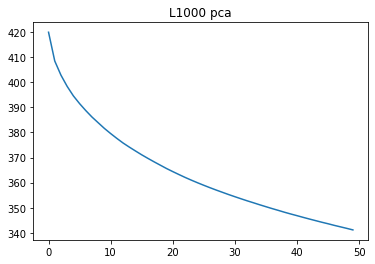

In [7]:
plt.plot(frobenius_norms)
plt.title('L1000 pca')